In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# read in dataframe
df = pd.read_csv('all_data.tsv', sep='\t')
# remove first column
df = df.iloc[: , 1:]

In [34]:
# remove all col containing only zeros
df = df.loc[:, (df != 0).any(axis=0)]

In [33]:
# drop ENSG00000125538.11|IL1B because it has no variance in the DU145 cell line
df = df.drop(columns=['ENSG00000125538.11|IL1B'])

In [35]:
# low variance filtering
values_df = df.iloc[: , 4:]
variance = values_df.var()
columns = values_df.columns
#saving the names of variables having variance more than a threshold value
threshold = np.percentile(variance, 99.5)
variable = [ ]
for i in range(0,len(variance)):
    if variance[i]>=threshold: #setting the threshold as 1%
        variable.append(columns[i])
new_cols = ['sample', 'cell_line', 'response', 'ID'] + variable
df_filtered = df[new_cols]

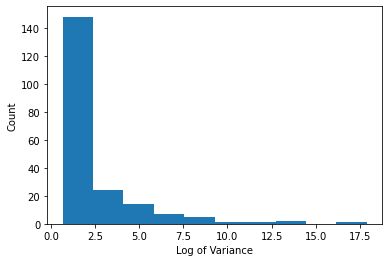

In [36]:
# plot variances
plt.hist(np.var(np.log(np.add(df_filtered.iloc[: , 4:], 1))))
plt.xlabel("Log of Variance")
plt.ylabel("Count");

### Perform normalization using all data

In [37]:
# log transform
df_filtered.iloc[: , 4:] = np.log2(np.add(df_filtered.iloc[: , 4:], 1))

In [38]:
# perform z-score normalization
df_normalized = df_filtered
df_normalized.iloc[: , 4:]=df_filtered.iloc[: , 4:].apply(lambda x: (x-x.mean())/x.std(), axis=0)

In [39]:
df_normalized.head()

,sample,cell_line,response,ID,ENSG00000008394.12|MGST1,ENSG00000078668.13|VDAC3,ENSG00000023734.10|STRAP,ENSG00000075415.12|SLC25A3,ENSG00000099860.8|GADD45B,ENSG00000100316.15|RPL3,...,ENSG00000231500.6|RPS18,ENSG00000225840.2|AC010970.2,ENSG00000139921.12|TMX1,ENSG00000173812.10|EIF1,ENSG00000245532.5|NEAT1,ENSG00000251562.7|MALAT1,ENSG00000248527.1|MTATP6P1,ENSG00000166710.17|B2M,ENSG00000104904.12|OAZ1,ENSG00000277791.4|PSMB3
0,GSM4161769,PC3,Res,84,-1.377295,-0.262543,-1.194097,0.084289,-1.085795,0.713587,...,-0.101213,1.212197,-0.944281,0.090477,1.817742,1.148482,1.197613,0.608182,-0.087235,-0.816005
1,GSM4161578,DU145,Res,55,1.438918,0.039067,0.551972,1.012144,0.790705,1.070004,...,0.804721,-0.096362,0.665905,1.067020,0.635339,1.342060,-0.385534,1.257607,0.783211,0.801770
2,GSM4161715,PC3,Res,30,-0.010744,0.387412,-1.714243,0.150038,-1.085795,0.143211,...,0.144990,0.471968,0.192153,0.618324,0.485331,-0.149197,1.321915,0.526012,0.660744,0.065383
3,GSM4161499,DU145,Sen,48,-1.062245,-2.858963,-0.442789,-1.790684,-0.023095,-1.339704,...,-0.971861,-0.636382,-1.318055,-0.645874,-1.994764,-1.502926,-2.509136,-0.935874,-1.089036,-2.225375
4,GSM4161745,PC3,Res,60,-0.625424,0.392954,-0.006055,0.134662,0.275109,0.213233,...,0.839275,0.235268,-0.204319,0.437307,0.123794,1.081546,0.363295,1.152453,-0.579297,0.041861


In [40]:
# save normalized data to csv for future use
df_normalized.to_csv('normalized_data.tsv', sep='\t')

### Perform normalization seperated by cell line

In [41]:
# PC3 cell line
df_normalized_PC3 = df_filtered.loc[df['cell_line'] == 'PC3']
df_normalized_PC3.iloc[: , 4:]=df_normalized_PC3.iloc[: , 4:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
# DU145 cell line
df_normalized_DU145 = df_filtered.loc[df['cell_line'] == 'DU145']
df_normalized_DU145.iloc[: , 4:]=df_normalized_DU145.iloc[: , 4:].apply(lambda x: (x-x.mean())/x.std(), axis=0)

/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [45]:
# save normalized data to csv for future use
df_normalized_PC3.to_csv('normalized_data_PC3.tsv', sep='\t')
df_normalized_DU145.to_csv('normalized_data_DU145.tsv', sep='\t')